In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostClassifier
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

In [6]:
df= pd.read_csv('data/stud.csv')

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
X=df.drop(columns=['math score'],axis=1)



In [9]:
print("categories in gender column:", df["gender"].unique())
print("categories in race_ethnicity column:", df["race/ethnicity"].unique())
print("categories in parental_level_of_education column:", df["parental level of education"].unique())
print("categories in lunch column:", df["lunch"].unique())
print("categories in test_preparation_course column:", df["test preparation course"].unique())

categories in gender column: ['female' 'male']
categories in race_ethnicity column: ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental_level_of_education column: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch column: ['standard' 'free/reduced']
categories in test_preparation_course column: ['none' 'completed']


In [10]:
y=df['math score']

In [11]:
num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformaer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("oneHotEncoder",oh_transformaer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)


In [12]:
X=preprocessor.fit_transform(X)

In [13]:
X.shape

(1000, 19)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

In [15]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    r2_square=r2_score(true,predicted)
    return mae,mse,rmse,r2_square

In [16]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(verbose=False),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "SVR":SVR()
}
model_list=[]
r2_list=[]

for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    model_train_mae,model_train_mse,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    
    model_test_mae,model_test_mse,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print("Model performance on training set")
    print(f"MAE:{model_train_mae}")
    print(f"MSE:{model_train_mse}")
    print(f"RMSE:{model_train_rmse}")
    print(f"R2_Score:{model_train_r2}")
    print("\n")
    print("Model performance on testing set")
    print(f"MAE:{model_test_mae}")
    print(f"MSE:{model_test_mse}")
    print(f"RMSE:{model_test_rmse}")
    print(f"R2_Score:{model_test_r2}")
    print("-----------------------------------------------------")  
    

LinearRegression
Model performance on training set
MAE:4.266711846071957
MSE:28.334870380648585
RMSE:5.323050852720513
R2_Score:0.8743172040139593


Model performance on testing set
MAE:4.21476314247485
MSE:29.095169866715484
RMSE:5.393993869732842
R2_Score:0.8804332983749565
-----------------------------------------------------
Ridge
Model performance on training set
MAE:4.264987823725981
MSE:28.337788233082442
RMSE:5.323324922741654
R2_Score:0.8743042615212909


Model performance on testing set
MAE:4.21110068801426
MSE:29.056272192348278
RMSE:5.390387016935637
R2_Score:0.8805931485028738
-----------------------------------------------------
Lasso
Model performance on training set
MAE:5.206302661246526
MSE:43.47840400585577
RMSE:6.593815587795565
R2_Score:0.8071462015863458


Model performance on testing set
MAE:5.157881810347763
MSE:42.5064168384116
RMSE:6.519694535667419
R2_Score:0.8253197323627853
-----------------------------------------------------
KNeighborsRegressor
Model perfo

In [28]:
# pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by='R2_Score',ascending=False)
something=pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

something

,Model Name,R2_Score


In [21]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)
print("R2 score:",score)

R2 score: 0.8804332983749565


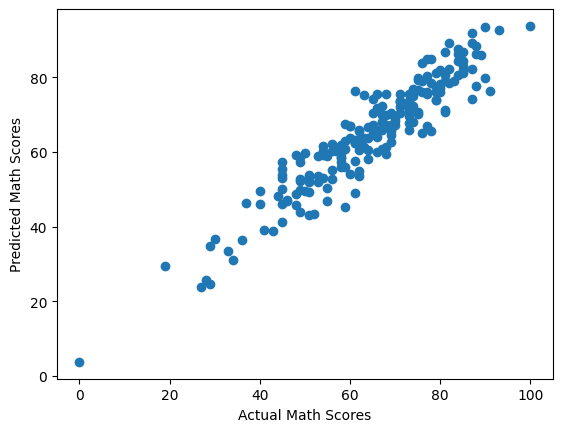

In [22]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.show()

In [26]:
pred_df=pd.DataFrame({'Actual Math Scores':y_test,'Predicted Math Scores':y_pred, 'Difference':y_test - y_pred})

In [27]:
pred_df

,Actual Math Scores,Predicted Math Scores,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
